In [23]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"

URL transformed to HTTPS due to an HSTS policy
--2024-01-23 06:09:58--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat.1’

Indian_pines_correc 100%[===================>]   5.68M  2.71MB/s    in 2.1s    

2024-01-23 06:10:00 (2.71 MB/s) - ‘Indian_pines_corrected.mat.1’ saved [5953527/5953527]

URL transformed to HTTPS due to an HSTS policy
--2024-01-23 06:10:00--  https://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat.1’

Indian_pines_gt.mat 100%[===================>]   1.1

In [24]:
!ls

Dataset.csv  Indian_pines_corrected.mat    Indian_pines_gt.mat	  IP_Bands.png	IP_KPCA_Bands.png
drive	     Indian_pines_corrected.mat.1  Indian_pines_gt.mat.1  IP_GT.png	sample_data


In [25]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


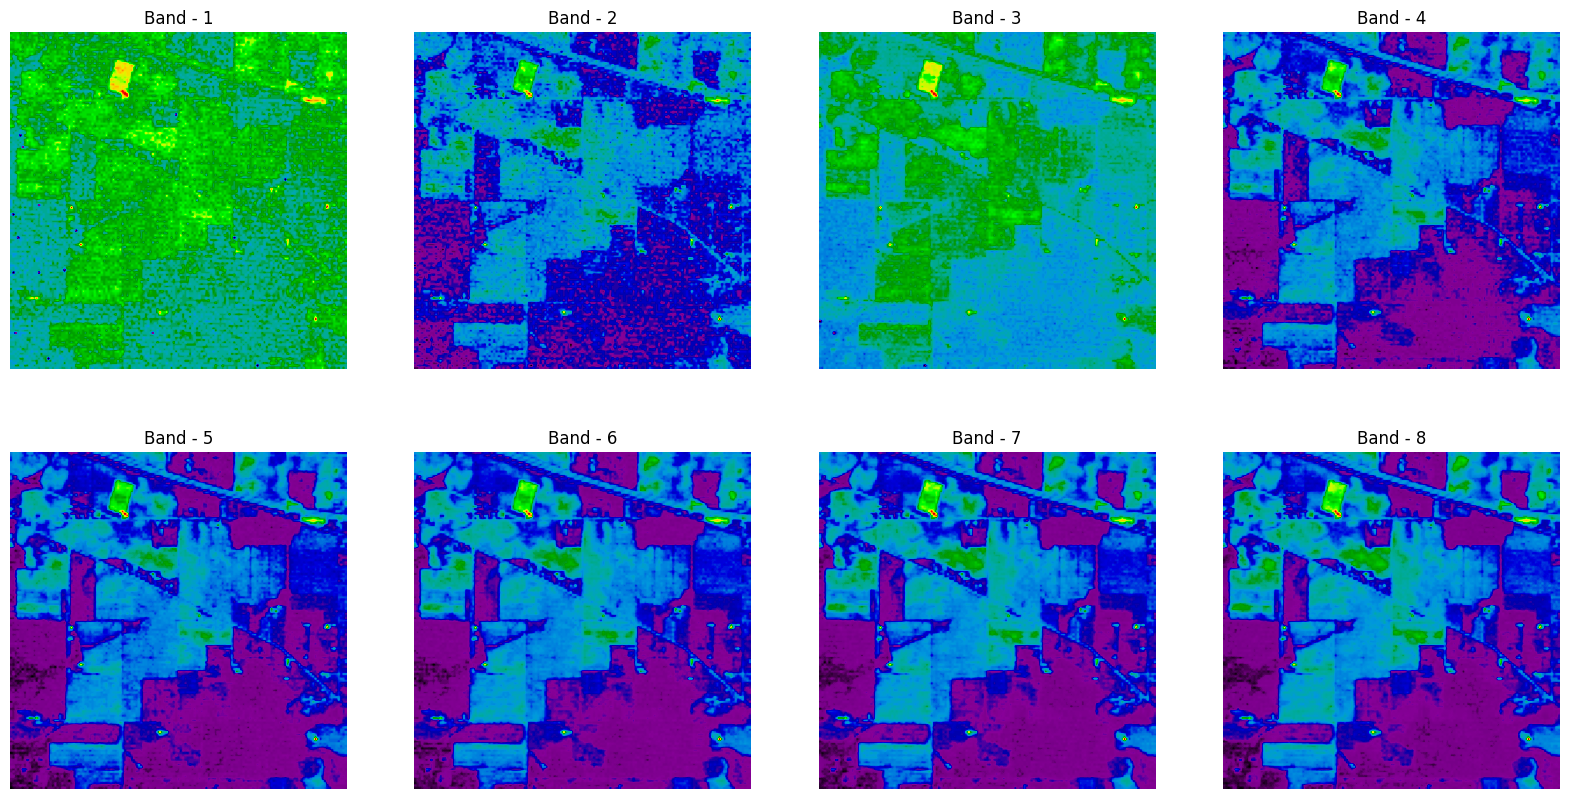

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 10))

for i in range(1, 8+1):
    fig.add_subplot(2,4, i)
    q =i
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

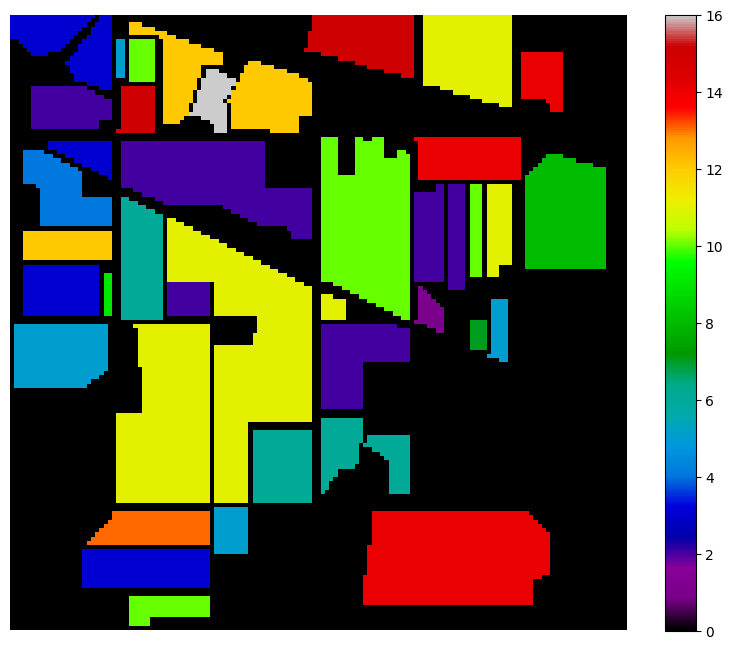

In [28]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

In [29]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X, y)

In [30]:

df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [32]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


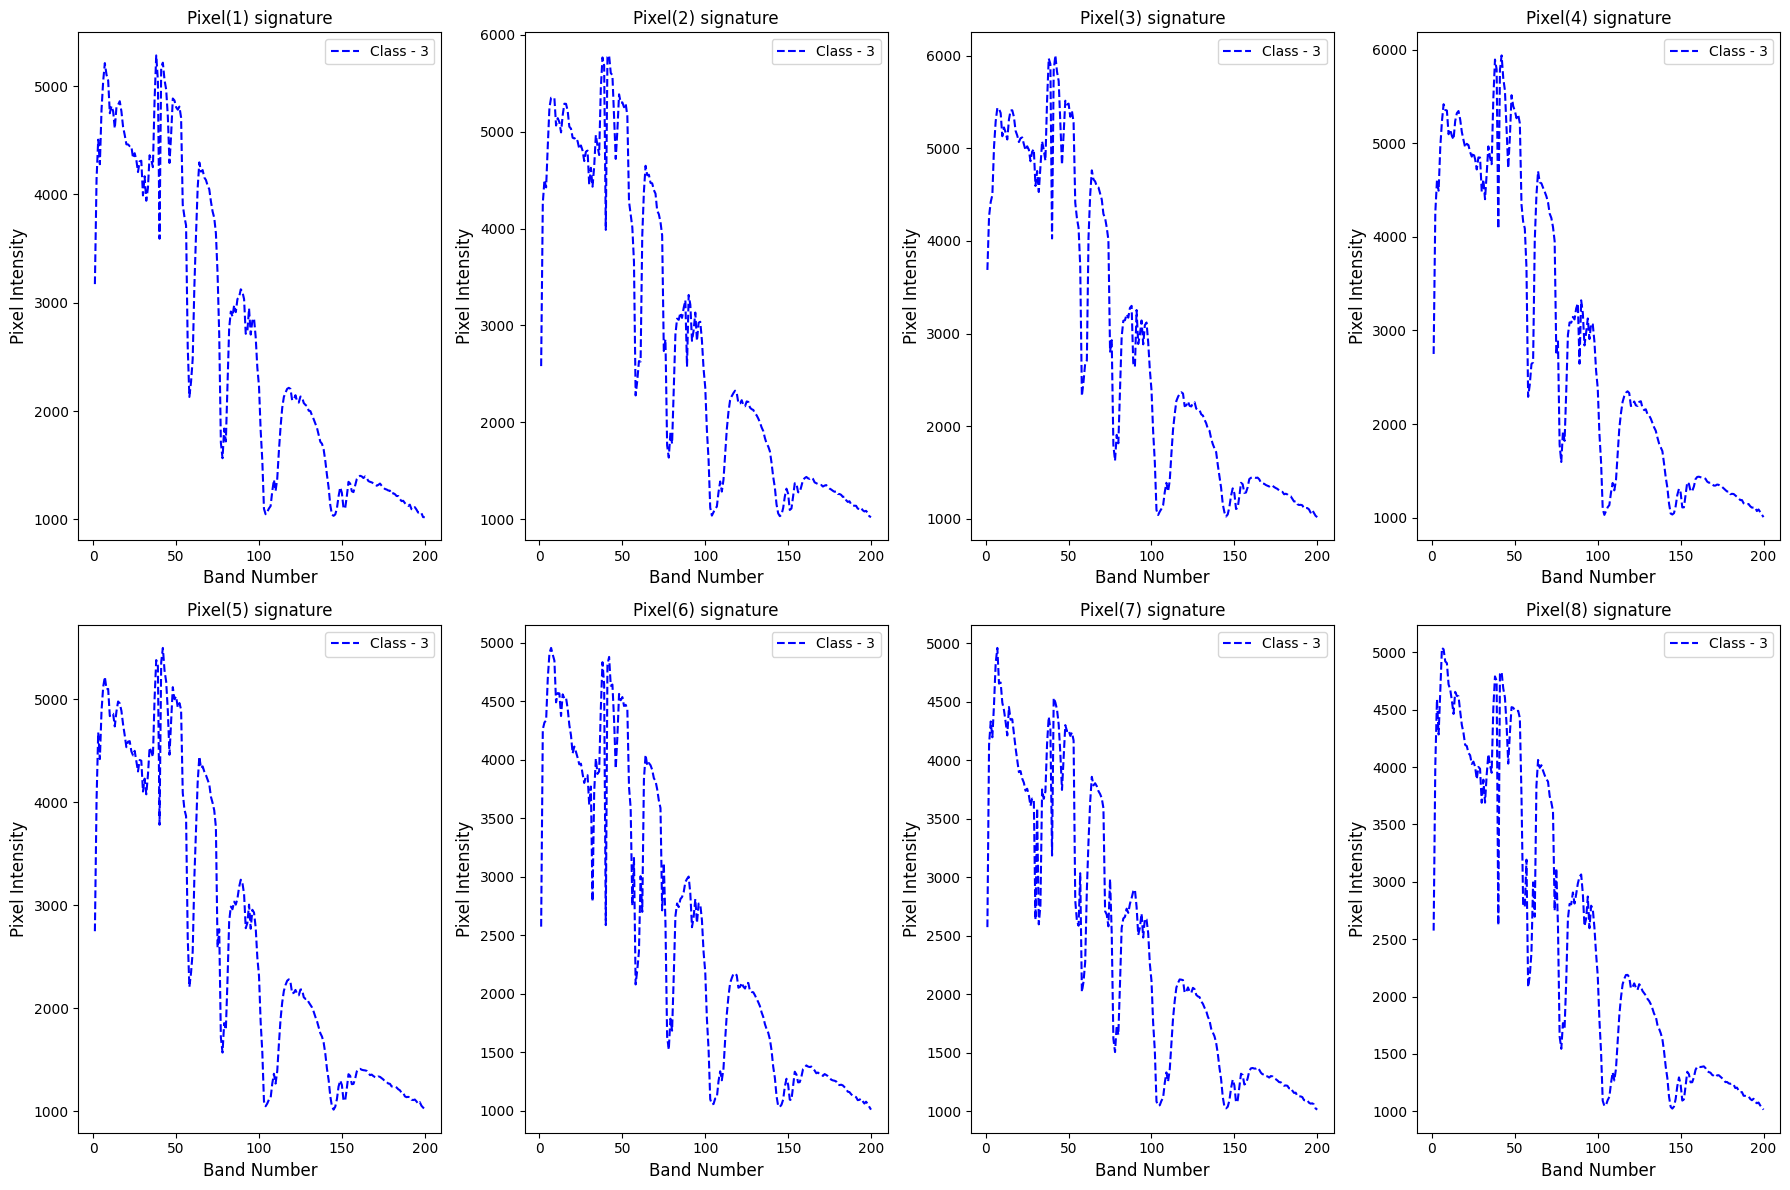

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signatures(df, num_signatures=8):
    plt.figure(figsize=(18, 12))

    for i in range(num_signatures):
        plt.subplot(2, 4, i + 1)  # 2 rows, 3 columns
        pixel_no = i
        plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label=f'Class - {df.iloc[pixel_no, -1]}')
        plt.legend()
        plt.title(f'Pixel({pixel_no+1}) signature', fontsize=12)
        plt.xlabel('Band Number', fontsize=12)
        plt.ylabel('Pixel Intensity', fontsize=12)

    plt.tight_layout()
    plt.show()

# Assuming df is the DataFrame containing hyperspectral data
plot_signatures(df, num_signatures=8)

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,0,3172,4142,4506,4279,4782,5048,5213,5106,5053,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,1,2580,4266,4502,4426,4853,5249,5352,5353,5347,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,2,3687,4266,4421,4498,5019,5293,5438,5427,5383,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,3,2749,4258,4603,4493,4958,5234,5417,5355,5349,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,4,2746,4018,4675,4417,4886,5117,5215,5096,5098,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [48]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values
X.shape, y.shape

((21025, 201), (21025,))

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import numpy as np

# Assuming X is your input data
kpca = KernelPCA(n_components=20, kernel='poly', eigen_solver='arpack')
pc = kpca.fit_transform(X)
q = pd.concat([pd.DataFrame(data = pc), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,21)]+['class']



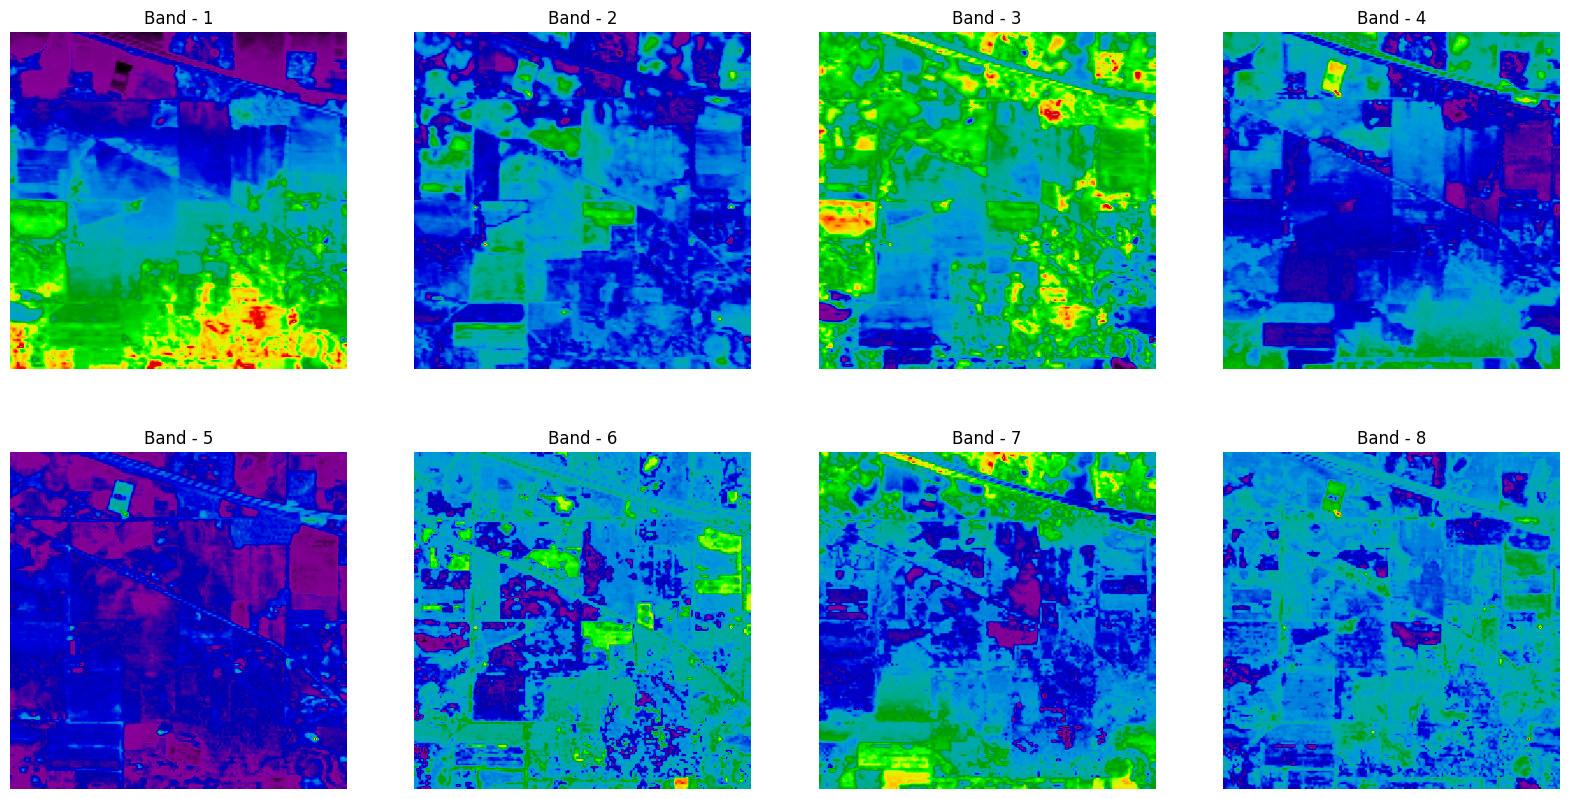

In [57]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_KPCA_Bands.png')

In [58]:
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC-1    21025 non-null  float64
 1   PC-2    21025 non-null  float64
 2   PC-3    21025 non-null  float64
 3   PC-4    21025 non-null  float64
 4   PC-5    21025 non-null  float64
 5   PC-6    21025 non-null  float64
 6   PC-7    21025 non-null  float64
 7   PC-8    21025 non-null  float64
 8   PC-9    21025 non-null  float64
 9   PC-10   21025 non-null  float64
 10  PC-11   21025 non-null  float64
 11  PC-12   21025 non-null  float64
 12  PC-13   21025 non-null  float64
 13  PC-14   21025 non-null  float64
 14  PC-15   21025 non-null  float64
 15  PC-16   21025 non-null  float64
 16  PC-17   21025 non-null  float64
 17  PC-18   21025 non-null  float64
 18  PC-19   21025 non-null  float64
 19  PC-20   21025 non-null  float64
 20  class   21025 non-null  int64  
dtypes: float64(20), int64(1)
memory usa

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

In [65]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

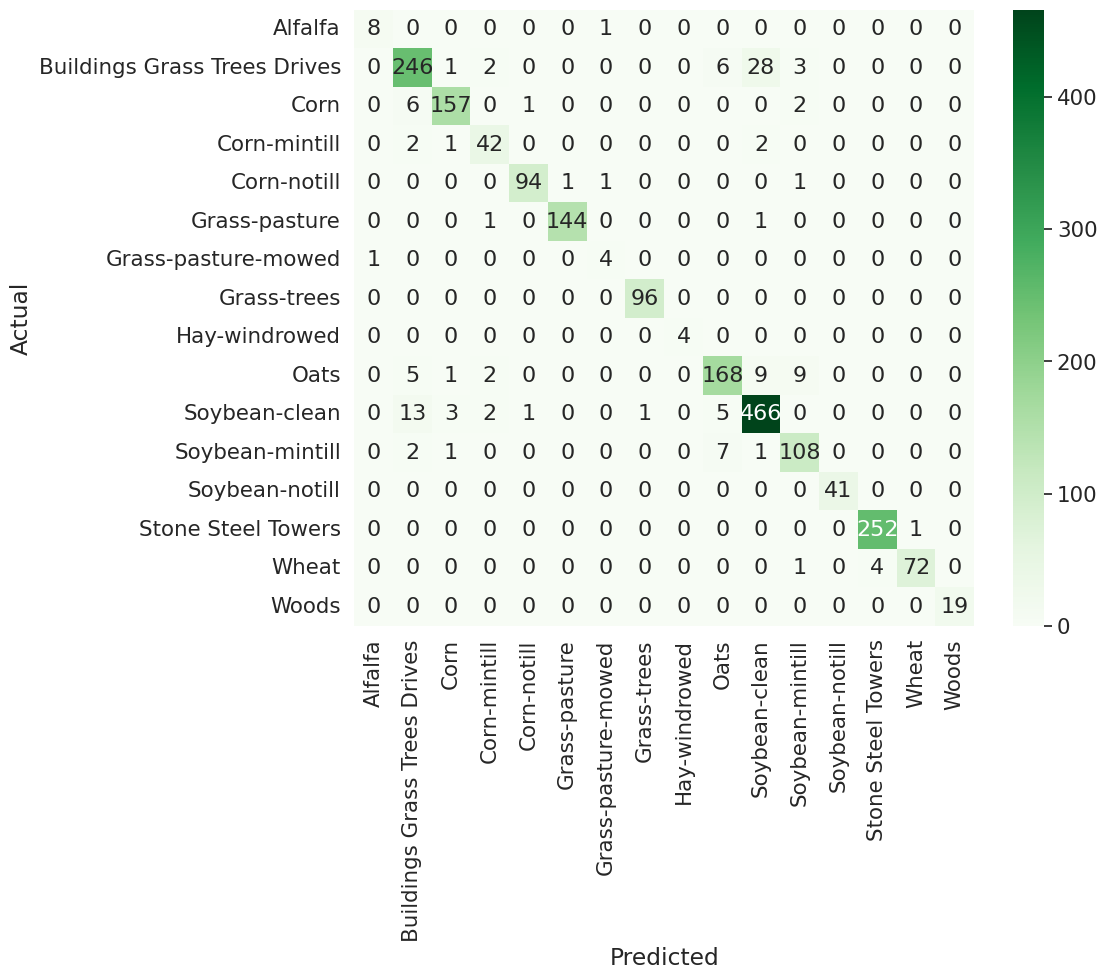

In [67]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [68]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.89      0.89      0.89         9
                 Corn-notill       0.90      0.86      0.88       286
                Corn-mintill       0.96      0.95      0.95       166
                        Corn       0.86      0.89      0.88        47
               Grass-pasture       0.98      0.97      0.97        97
                 Grass-trees       0.99      0.99      0.99       146
         Grass-pasture-mowed       0.67      0.80      0.73         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       1.00      1.00      1.00         4
              Soybean-notill       0.90      0.87      0.88       194
             Soybean-mintill       0.92      0.95      0.93       491
               Soybean-clean       0.87      0.91      0.89       119
                       Wheat       1.00      1.00      1.00        41
                   

In [69]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

<ipython-input-70-82a5503cfa46>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145, 145).astype('float')


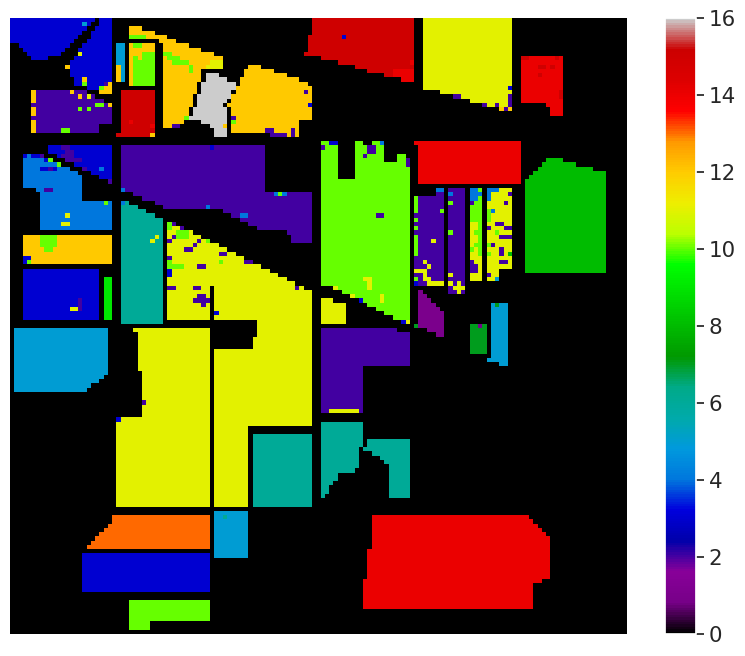

In [70]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()